In [13]:
list.files(path = "../input")


[1] "Tourism_new.xlsx"

In [5]:
# Core Tidyverse
library(tidyverse)
library(glue)
library(forcats)
library(magrittr)

# Time Series
library(timetk)
library(tidyquant)
library(tibbletime)

# Visualization
library(cowplot)

# Preprocessing
library(recipes)

# Sampling / Accuracy
library(rsample)
library(yardstick) 

# Modeling
library(keras)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.1          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The

In [2]:
### 1. Loading Data

tourism.data=readxl::read_xlsx("../input/Tourism_new.xlsx")
tourism <- ts(tourism.data[,2],start= c(1988),end = c(2019,12),frequency=12)
tourism


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1988,132297,108405,95435,105923,127611,119867,106016,132728,144678,148052,149156,136776
1989,138840,108804,94649,111381,136857,129419,109961,136294,162181,176343,155633,142279
1990,155497,114046,104237,120188,148884,135666,130581,170321,167134,191627,177984,154758
1991,149653,122986,107989,110033,143973,133941,128067,146263,151241,180270,144177,114567
1992,130878,113862,109988,114658,149215,141830,122693,158942,174304,203098,177475,167268
1993,148559,134895,123446,124385,160971,153529,139746,174622,189573,173182,150019,149680
1994,146191,118200,103371,118171,148225,136917,125693,165048,188877,214408,192551,172642
1995,187129,142501,120183,124908,168969,159519,133995,107609,156926,219501,197343,187614
1996,188252,146715,122918,128137,171458,159892,150261,196682,221524,252887,224029,219635
1997,196196,158785,132833,133154,176347,167985,160840,204126,240620,273310,240569,227458


In [6]:
L_FTA <- tourism %>%
    tk_tbl() %>%
    mutate(index = as_date(index)) %>%
    as_tbl_time(index = index)

L_FTA

index,value
<date>,<dbl>
1988-01-01,132297
1988-02-01,108405
1988-03-01,95435
1988-04-01,105923
1988-05-01,127611
1988-06-01,119867
1988-07-01,106016
1988-08-01,132728
1988-09-01,144678


`geom_smooth()` using formula 'y ~ x'



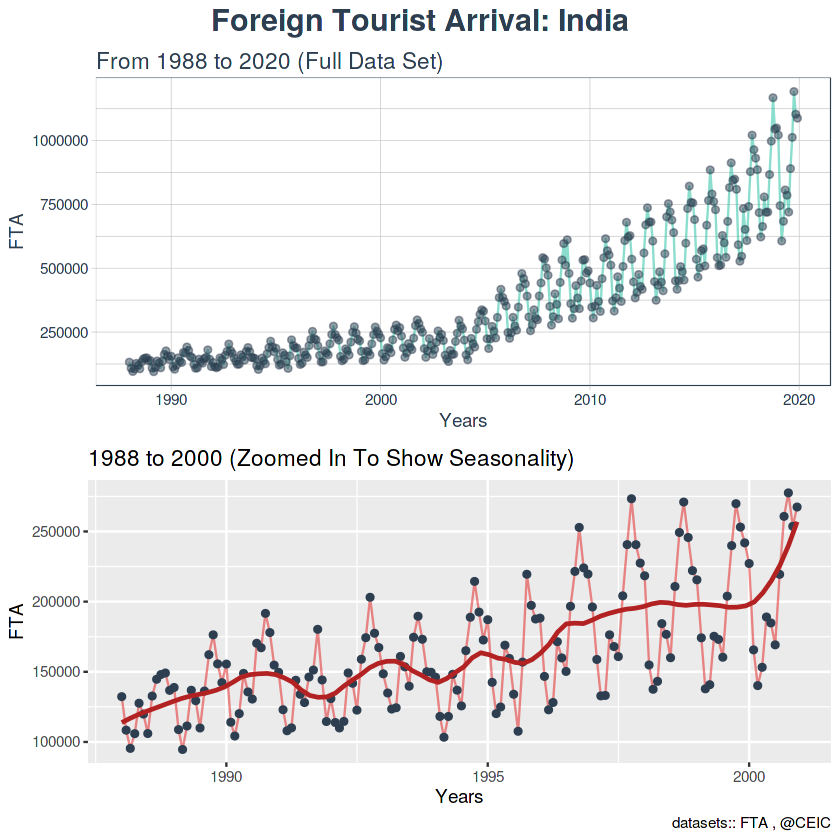

In [9]:
options(scipen=999)
p1 <- L_FTA %>%
    ggplot(aes(index, value)) +
    geom_line(color = palette_light()[[3]], alpha = 0.5) +
    geom_point(color = palette_light()[[1]], alpha = 0.5) +
    theme_tq() +
    labs(
        title = "From 1988 to 2020 (Full Data Set)", x = "Years", y = "FTA"
    )

p2 <- L_FTA %>%
    filter_time("start" ~ "2000") %>%
    ggplot(aes(index, value)) +
    geom_line(color = palette_light()[[2]], alpha = 0.5) +
    geom_point(color = palette_light()[[1]]) +
    geom_smooth(method = "loess", color = "firebrick",span = 0.2, se = FALSE) +
    labs(
        title = "1988 to 2000 (Zoomed In To Show Seasonality)", x= "Years", y = "FTA",
        caption = "datasets:: FTA , @CEIC"
    )

p_title <- ggdraw() + 
    draw_label("Foreign Tourist Arrival: India", size = 18, fontface = "bold", colour = palette_light()[[1]])

plot_grid(p_title, p1, p2, ncol = 1, rel_heights = c(0.1, 1, 1))

In [11]:
tidy_acf <- function(data, value, lags = 0:20) {
    
    value_expr <- enquo(value)
    
    acf_values <- data %>%
        pull(value) %>%
        acf(lag.max = tail(lags, 1), plot = FALSE) %>%
        .$acf %>%
        .[,,1]
    
    ret <- tibble(acf = acf_values) %>%
        rowid_to_column(var = "lag") %>%
        mutate(lag = lag - 1) %>%
        filter(lag %in% lags)
    
    return(ret)
}

max_lag <- 12 * 32

L_FTA %>%
    tidy_acf(value, lags = 0:max_lag)



lag,acf
<dbl>,<dbl>
0,1.0000000
1,0.9531563
2,0.8857082
3,0.8253118
4,0.7812496
5,0.7401344
6,0.7159140
7,0.7279062
8,0.7531752


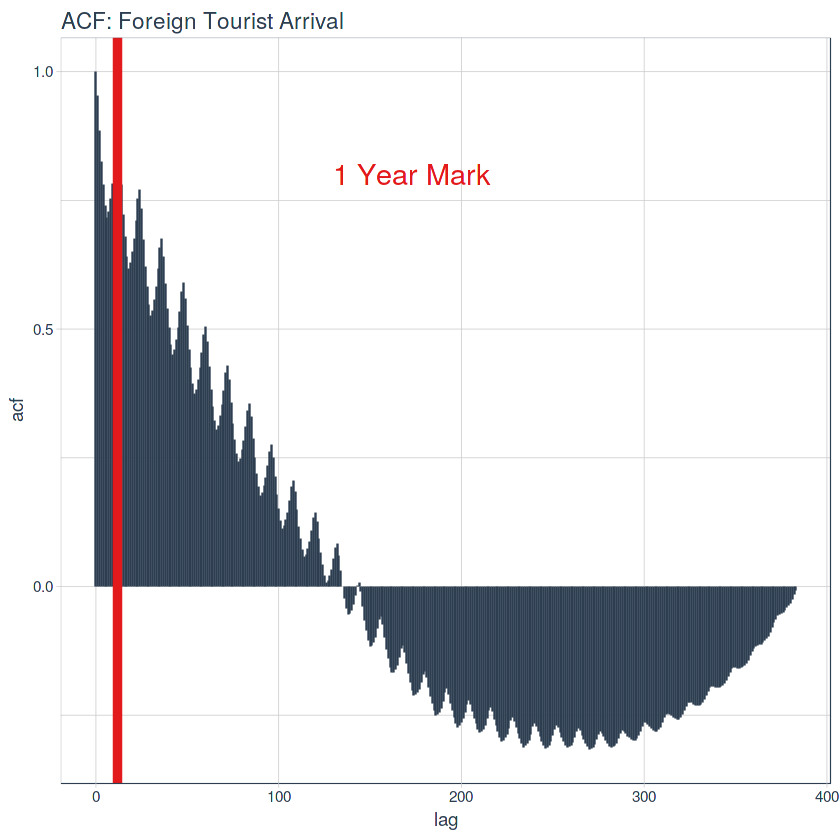

In [12]:
#We see here that the autocorrelation lag doesnot exceed 0.5 mark beyond 1 years. 
#So we can use one of these high lags to train our LSTM  model. 


L_FTA %>%
    tidy_acf(value, lags = 0:max_lag) %>%
    ggplot(aes(lag, acf)) +
    geom_segment(aes(xend = lag, yend = 0), color = palette_light()[[1]]) +
    geom_vline(xintercept = 12, size = 2, color = palette_light()[[2]]) +
    annotate("text", label = "1 Year Mark", x = 130, y = 0.8, 
             color = palette_light()[[2]], size = 6, hjust = 0) +
    theme_tq() +
    labs(title = "ACF: Foreign Tourist Arrival")

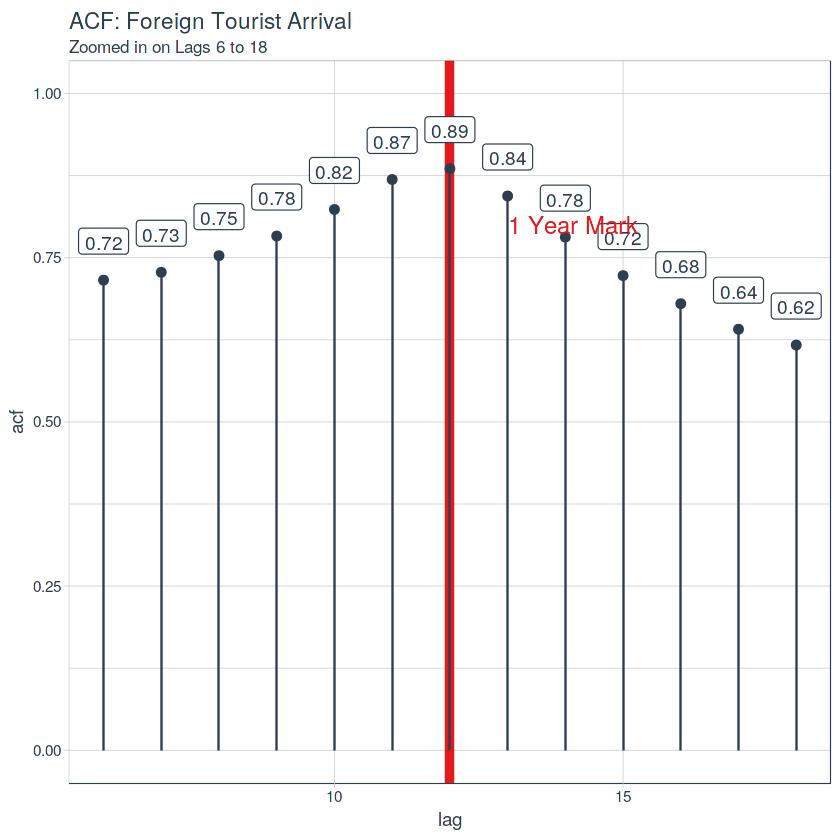

In [13]:
L_FTA %>%
    tidy_acf(value, lags = 6:18) %>%
    ggplot(aes(lag, acf)) +
    geom_vline(xintercept = 12, size = 2, color = palette_light()[[2]]) +
    geom_segment(aes(xend = lag, yend = 0), color = palette_light()[[1]]) +
    geom_point(color = palette_light()[[1]], size = 2) +
    geom_label(aes(label = acf %>% round(2)), vjust = -1,
              color = palette_light()[[1]]) +
    annotate("text", label = "1 Year Mark", x = 13, y = 0.8, 
             color = palette_light()[[2]], size = 5, hjust = 0) +
    ylim(c(0,1)) +
    theme_tq() +
    labs(title = "ACF: Foreign Tourist Arrival",
         subtitle = "Zoomed in on Lags 6 to 18")

In [14]:
optimal_lag_setting <- L_FTA %>%
    tidy_acf(value, lags = 6:18) %>%
    filter(acf == max(acf)) %>%
    pull(lag)

optimal_lag_setting

[1] 12

In [15]:
### Backtesting: Time Series Cross Validation

periods_train <- 12 * 6
periods_test  <- 12 * 2
skip_span     <- 12 * 3

rolling_origin_resamples <- rolling_origin(
    L_FTA,
    initial    = periods_train,
    assess     = periods_test,
    cumulative = FALSE,
    skip       = skip_span, 
)

rolling_origin_resamples

splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [16]:
# Plotting function for a single split
plot_split <- function(split, expand_y_axis = TRUE, alpha = 1, size = 1, base_size = 14) {
    
    # Manipulate data
    train_tbl <- training(split) %>%
        add_column(key = "training") 
    
    test_tbl  <- testing(split) %>%
        add_column(key = "testing") 
    
    data_manipulated <- bind_rows(train_tbl, test_tbl) %>%
        as_tbl_time(index = index) %>%
        mutate(key = fct_relevel(key, "training", "testing"))
        
    # Collect attributes
    train_time_summary <- train_tbl %>%
        tk_index() %>%
        tk_get_timeseries_summary()
    
    test_time_summary <- test_tbl %>%
        tk_index() %>%
        tk_get_timeseries_summary()
    
    # Visualize
    g <- data_manipulated %>%
        ggplot(aes(x = index, y = value, color = key)) +
        geom_line(size = size, alpha = alpha) +
        theme_tq(base_size = base_size) +
        scale_color_tq() +
        labs(
            title    = glue("Split: {split$id}"),
            subtitle = glue("{train_time_summary$start} to {test_time_summary$end}"),
            y = "", x = ""
        ) +
        theme(legend.position = "none") 
    
    if (expand_y_axis) {
        
        L_FTA_time_summary <- L_FTA %>% 
            tk_index() %>% 
            tk_get_timeseries_summary()
        
        g <- g +
            scale_x_date(limits = c(L_FTA_time_summary$start, 
                                    L_FTA_time_summary$end))
    }
    
    return(g)
}

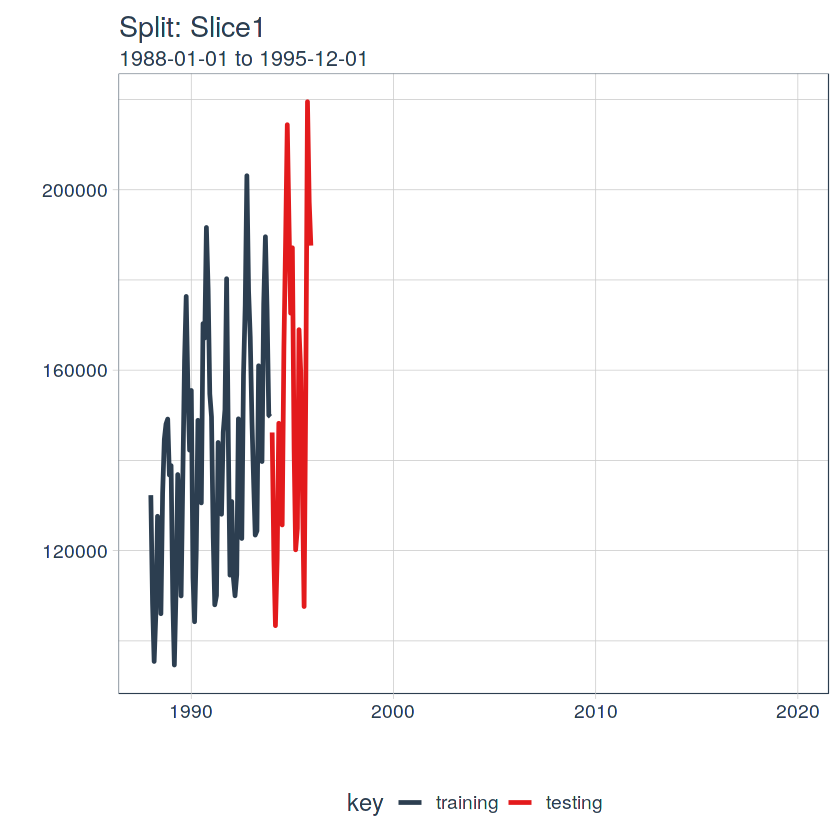

In [17]:
#The plot_split() function takes one split (in this case Slice01), and returns a visual of the sampling strategy. We expand the axis to the range for the full dataset using expand_y_axis = TRUE.

rolling_origin_resamples$splits[[1]] %>%
    plot_split(expand_y_axis = TRUE) +
    theme(legend.position = "bottom")

In [18]:
#The second function, plot_sampling_plan(), scales the plot_split() function to all of the samples using purrr and cowplot.


# Plotting function that scales to all splits 
plot_sampling_plan <- function(sampling_tbl, expand_y_axis = TRUE, 
                               ncol = 3, alpha = 1, size = 1, base_size = 14, 
                               title = "Sampling Plan") {
    
    # Map plot_split() to sampling_tbl
    sampling_tbl_with_plots <- sampling_tbl %>%
        mutate(gg_plots = map(splits, plot_split, 
                              expand_y_axis = expand_y_axis,
                              alpha = alpha, base_size = base_size))
    
    # Make plots with cowplot
    plot_list <- sampling_tbl_with_plots$gg_plots 
    
    p_temp <- plot_list[[1]] + theme(legend.position = "bottom")
    legend <- get_legend(p_temp)
    
    p_body  <- plot_grid(plotlist = plot_list, ncol = ncol)
    
    p_title <- ggdraw() + 
        draw_label(title, size = 18, fontface = "bold", colour = palette_light()[[1]])
    
    g <- plot_grid(p_title, p_body, legend, ncol = 1, rel_heights = c(0.05, 1, 0.05))
    
    return(g)
    
}

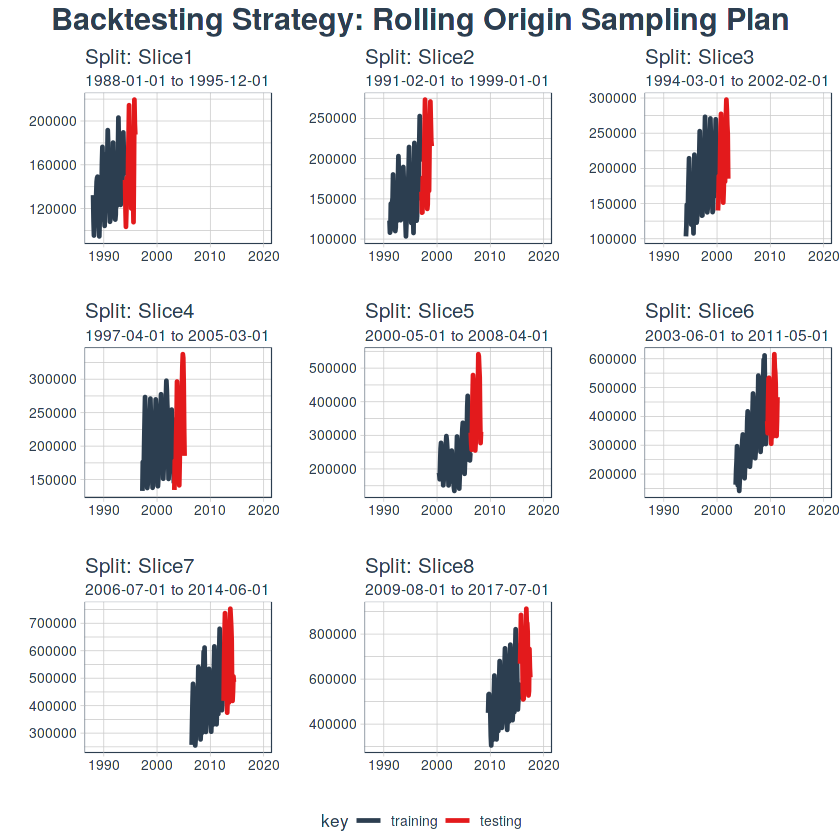

In [19]:
# We can now visualize the ENTIRE BACKTESTING STRATEGY with plot_sampling_plan()! We can see how the sampling plan shifts the sampling window with each progressive slice of the train/test splits.

rolling_origin_resamples %>%
    plot_sampling_plan(expand_y_axis = T, ncol = 3, alpha = 1, size = 1, base_size = 10, 
                       title = "Backtesting Strategy: Rolling Origin Sampling Plan")

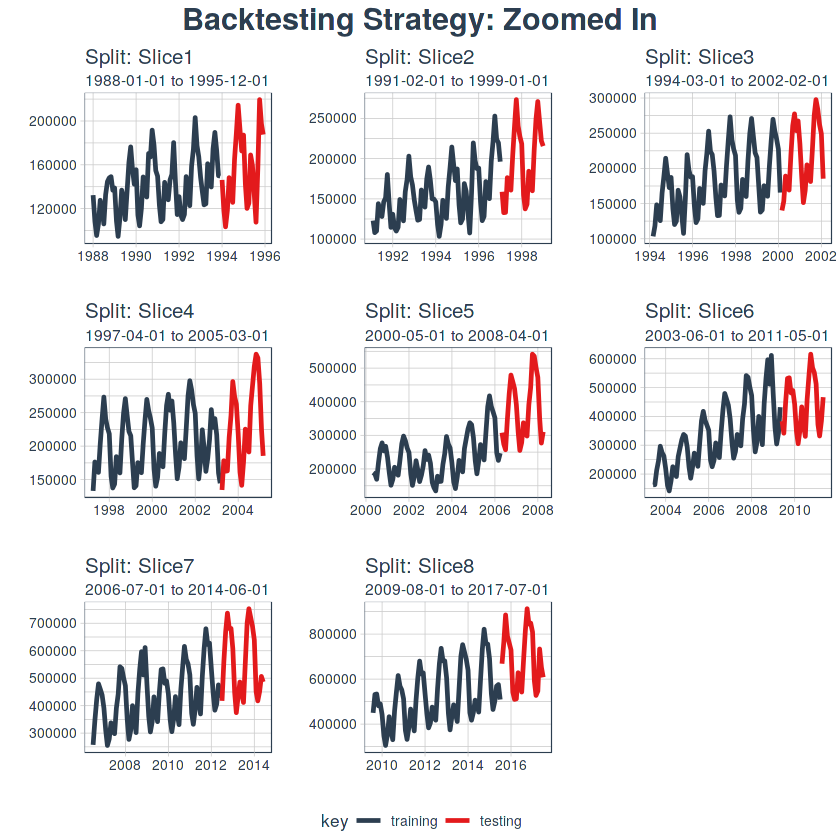

In [20]:
#And, we can set expand_y_axis = FALSE to zoom in on the samples.

rolling_origin_resamples %>%
    plot_sampling_plan(expand_y_axis = F, ncol = 3, alpha = 1, size = 1, base_size = 10, 
                       title = "Backtesting Strategy: Zoomed In")

In [21]:
# We’ll use this Backtesting Strategy (11 samples from one time series each with 50/10 split in years and a 20 year offset) when testing the veracity of the LSTM model on the sunspots dataset.

### Modeling The Keras Stateful LSTM Model

split    <- rolling_origin_resamples$splits[[8]]
split_id <- rolling_origin_resamples$id[[8]]

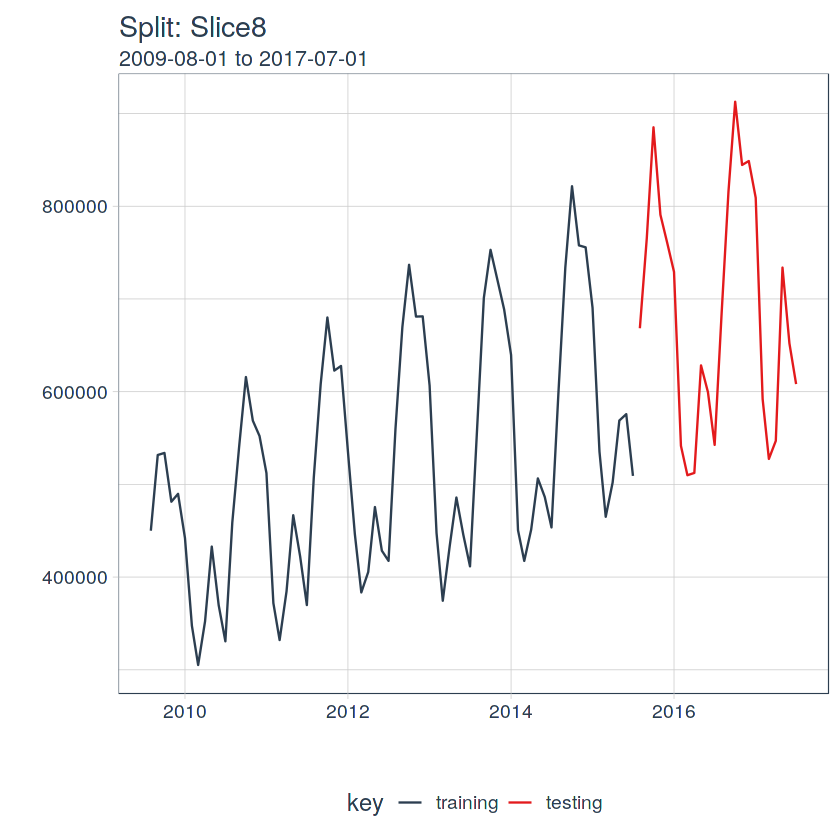

In [22]:
### 5.1.1 Visualizing The Split

# We can reuse the plot_split() function to visualize the split. Set expand_y_axis = FALSE to zoom in on the subsample.


plot_split(split, expand_y_axis = FALSE, size = 0.5) +
    theme(legend.position = "bottom") +
    ggtitle(glue("Split: {split_id}"))

In [23]:
### Data Setup

# First, let’s combine the training and testing data sets into a single data set with a column key that specifies what set they came from (either “training” or “testing)”. Note that the tbl_time object will need to have the index re-specified during the bind_rows() step.

df_trn <- training(split)
df_tst <- testing(split)

df <- bind_rows(
    df_trn %>% add_column(key = "training"),
    df_tst %>% add_column(key = "testing")
) %>% 
    as_tbl_time(index = index)

df

index,value,key
<date>,<dbl>,<chr>
2009-08-01,450013,training
2009-09-01,531683,training
2009-10-01,533904,training
2009-11-01,481308,training
2009-12-01,489787,training
2010-01-01,442062,training
2010-02-01,347544,training
2010-03-01,305183,training
2010-04-01,352353,training


In [24]:
### Preprocessing With Recipes

# The LSTM algorithm requires the input data to be centered and scaled. We can preprocess the data using the recipes package. We’ll use a combination of step_sqrt to transform the data and reduce the presence of outliers and step_center and step_scale to center and scale the data. The data is processed/transformed using the bake() function.


rec_obj <- recipe(value ~ ., df) %>%
    step_sqrt(value) %>%
    step_center(value) %>%
    step_scale(value) %>%
    prep()

df_processed_tbl <- bake(rec_obj, df)

df_processed_tbl

index,key,value
<date>,<fct>,<dbl>
2009-08-01,training,-0.78261504
2009-09-01,training,-0.16942002
2009-10-01,training,-0.15342804
2009-11-01,training,-0.54154988
2009-12-01,training,-0.47759616
2010-01-01,training,-0.84518607
2010-02-01,training,-1.63721174
2010-03-01,training,-2.02713335
2010-04-01,training,-1.59448614


In [25]:
# Next, let’s capture the center/scale history so we can invert the center and scaling after modeling. The square-root transformation can be inverted by squaring the inverted center/scale values.

center_history <- rec_obj$steps[[2]]$means["value"]
scale_history  <- rec_obj$steps[[3]]$sds["value"]

c("center" = center_history, "scale" = scale_history)

center.value  scale.value 
    745.2836      95.1343

In [26]:
### LSTM Plan

# We need a plan for building the LSTM. First, a couple PRO TIPS with LSTM’s:

_# Tensor Format:_

#__Predictors__ (X) must be a 3D Array with dimensions: [samples, timesteps, features]: The first dimension is the length of values, the second is the number of time steps (lags), and the third is the number of predictors (1 if univariate or n if multivariate)
#Outcomes/Targets (y) must be a 2D Array with dimensions: [samples, timesteps]: The first dimension is the length of values and the second is the number of time steps (lags)
#Training/Testing:

#The training and testing length must be evenly divisible (e.g. training length / testing length must be a whole number)

#_Batch Size:__

#The batch size is the number of training examples in one forward/backward pass of a RNN before a weight update
#The batch size must be evenly divisible into both the training an testing lengths (e.g. training length / batch size and testing length / batch size must both be whole numbers)

#__Time Steps:__

#A time step is the number of lags included in the training/testing set
#For our example, our we use a single lag

#__Epochs:__

#The epochs are the total number of forward/backward pass iterations
#Typically more improves model performance unless overfitting occurs at which time the validation accuracy/loss will not improve. 


#Taking this in, we can come up with a plan. We’ll select a prediction of window 12 months (1 year) or the length of our test set. The best correlation occurs at 36, but this is not evenly divisible by the forecasting range. We could increase the forecast horizon, but this offers a minimal increase in autocorrelation. We can select a batch size of 6 units which evenly divides into the number of testing and training observations. We select time steps = 1, which is because we are only using one lag. Finally, we set epochs = 300, but this will need to be adjusted to balance the bias/variance tradeoff.

ERROR: Error in parse(text = x, srcfile = src): <text>:5:1: unexpected input
4: 
5: _
   ^


In [27]:
# Model inputs
lag_setting  <- 24 # = nrow(df_tst)
batch_size   <- 4
train_length <- 60
tsteps       <- 1
epochs       <- 1

In [29]:
# Training Set
lag_train_tbl <- df_processed_tbl %>%
    mutate(value_lag = lag(value, n = lag_setting)) %>%
    filter(!is.na(value_lag)) %>%
    filter(key == "training") %>%
    tail(train_length)

x_train_vec <- lag_train_tbl$value_lag
x_train_arr <- array(data = x_train_vec, dim = c(length(x_train_vec), 1, 1))

y_train_vec <- lag_train_tbl$value
y_train_arr <- array(data = y_train_vec, dim = c(length(y_train_vec), 1))

# Testing Set
lag_test_tbl <- df_processed_tbl %>%
    mutate(
        value_lag = lag(value, n = lag_setting)
    ) %>%
    filter(!is.na(value_lag)) %>%
    filter(key == "testing")

x_test_vec <- lag_test_tbl$value_lag
x_test_arr <- array(data = x_test_vec, dim = c(length(x_test_vec), 1, 1))

y_test_vec <- lag_test_tbl$value
y_test_arr <- array(data = y_test_vec, dim = c(length(y_test_vec), 1))

In [30]:
### Building The LSTM Model

model <- keras_model_sequential()

model %>%
    layer_lstm(units            = 5, 
               input_shape      = c(tsteps, 1), 
               batch_size       = batch_size,
               return_sequences = TRUE, 
               stateful         = TRUE) %>% 
    layer_lstm(units            = 5, 
               return_sequences = FALSE, 
               stateful         = TRUE) %>% 
    layer_dense(units = 1)

model %>% 
    compile(loss = 'mae', optimizer = 'adam')

model

ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): ValueError: If a RNN is stateful, it needs to know its batch size. Specify the batch size of your input tensors: 
- If using a Sequential model, specify the batch size by passing a `batch_input_shape` argument to your first layer.
- If using the functional API, specify the batch size by passing a `batch_shape` argument to your Input layer.

Detailed traceback: 
  File "/usr/local/share/.virtualenvs/r-reticulate/lib/python3.7/site-packages/tensorflow_core/python/training/tracking/base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/share/.virtualenvs/r-reticulate/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/sequential.py", line 178, in add
    layer(x)
  File "/usr/local/share/.virtualenvs/r-reticulate/lib/python3.7/site-packages/tensorflow_core/python/keras/layers/recurrent.py", line 623, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/usr/local/share/.virtualenvs/r-reticulate/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer.py", line 817, in __call__
    self._maybe_build(inputs)
  File "/usr/local/share/.virtualenvs/r-reticulate/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/base_layer.py", line 2141, in _maybe_build
    self.build(input_shapes)
  File "/usr/local/share/.virtualenvs/r-reticulate/lib/python3.7/site-packages/tensorflow_core/python/keras/layers/recurrent.py", line 561, in build
    self.reset_states()
  File "/usr/local/share/.virtualenvs/r-reticulate/lib/python3.7/site-packages/tensorflow_core/python/keras/layers/recurrent.py", line 818, in reset_states
    raise ValueError('If a RNN is stateful, it needs to know '

